# Computational Economics: Unconstrained Optimization


Florian Oswald
Sciences Po, 2017

## Some Taxonomy and Initial Examples

* In most of the examples to follow, we talk about *minimization* of a function $f$. Everything we do also applies to maximization, since $\min_x f(x) = \max_x -f(x)$.
* Here is a generic optimization problem:
	$$ 
        \min_{x\in\mathbb{R}^n} f(x) \text{ s.t. } 
        \begin{array}{cc} c_i(x) = 0, & i \in E \\
        c_i(x) \geq 0, & i\in I 
        \end{array}
    $$

* This is a general way of writing an optimization problem. E are all indices as equality constraints, I are all inequality constraints.
* An example of such a problem might be
	$$ 
        \min (x_1 -2)^2 + (x_2 -1)^2 \text{ s.t. } 
        \begin{array}{cc}
         x_{1}^2 -x_2 \leq 0 \\
         x_1 +x_2 \leq 2 
         \end{array}
    $$
* Here is a picture of that problem taken from the textbook [@nocedal-wright] ( for copyright reasons, I cannot show this in the online version of the slides. ):



![Figure 1.1 in [@nocedal-wright]](assets/figs-restricted/feasible-region.png) 

## Kinds of problems considered

* Don't talk about stochastic optimization methods:
	* Simluated Annealing
	* MCMC 
	* other Stochastic Search Methods
	* A gentle introduction is 	[@casella-R]




## Transportation Problem

> A chemical company has two factories $F_1,F_2$ and a dozen retail outlets $R_1,\dots,R_{12}$. Each factory $i$ can produce at most $a_i$ tons of output each week. Each retail outlet $j$ has a weekly demand of $b_j$ tons per week. The cost of shipping from $F_i$ to $R_j$ is given by $c_{ij}$.
> How much of the product to ship from each factory to each outlet, minimize cost, and satisfy all constraints? let's call $x_{ij}$ the number of tons shipped from $i$ to $j$.


![Figure 1.2 in [@nocedal-wright]](assets/figs-restricted/transportation.png)


* A mathematical formulation of this problem is
	$$ 
        \begin{aligned}
		\min \sum_{ij} c_{ij} x_{ij} \\
		\text{subject to} \sum_{j=1}^{12} x_{ij} \leq a_i,\quad i=1,2 \\
		\sum_{i=1}^2  x_{ij} \geq b_j,\quad j=1,\dots,12  \\
		x_{ij} \geq 0, \quad i=1,2,j=1,\dots,12
		\end{aligned}
	$$

* This is called a *linear programming* problem, because both objective function and all constrains are linear.
* With any of those being nonlinear, we would call this a non-linear problem.

## Constrained vs Unconstrained

* There are many applications of both in economics.
* Unconstrained: maximimum likelihood
* Constrained: MPEC
* It is sometimes possible to transform a constrained problem into an unconstrained one.

## Convexity

* Convex problems are easier to solve.
* What is convex?

> A set $S\in\mathbb{R}^n$ is convex if the straight line segment connecting any two points in $S$ lies entirely inside $S$.
> A function $f$ is a convex function, if its domain $S$ is a convex set, and for any two points $x,y \in S$, we have that
	$$ f(\alpha x + (1-\alpha)y) \leq \alpha f(x) + (1-\alpha) f(y) $$
	for all $\alpha \in [0,1]$

* Simple instances of convex sets are the unit ball $\{y \in \mathbb{R}^n, \Vert y\Vert_2 \leq 1\}$, and any set defined by linear equalities and inequalities.
* *convex Programming* describes a special case of the introductory minimizatin problem where 
	* the objective function is convex, 
	* the equality constrains are linear, and 
	* the inequality constraints are concave.

## Optimization Algorithms

* All of the algorithms we are going to see employ some kind of *iterative* proceedure. 
* They try to improve the value of the objective function over successive steps.
* The way the algorithm goes about generating the next step is what distinguishes algorithms from one another.
	* Some algos only use the objective function
	* Some use both objective and gradients
	* Some add the Hessian
	* and many variants more

## Desirable Features of any Algorithm

* Robustness: We want good performance on a wide variety of problems in their class, and starting from *all* reasonable starting points.
* Efficiency: They should be fast and not use an excessive amount of memory.
* Accuracy: They should identify the solution with high precision.



## A Word of Caution

* You should **not** normally attempt to write a numerical optimizer for yourself.
* Entire generations of Applied Mathematicians and other numerical pro's have worked on those topics before you, so you should use their work.
	* Any optimizer you could come up with is probably going to perform below par, and be highly likely to contain mistakes.
	* Don't reinvent the wheel.
* That said, it's very important that we understand some basics about the main algorithms, because your task is **to choose from the wide array of available ones**.

# Unconstrained Optimization: What is a solution?

* A typical unconstrained optimization problem will look something like this:
	$$ \min_x f(x),\quad x\in \mathbb{R}^n $$
	and where $f : \mathbb{R}^n \mapsto \mathbb{R}$ is a smooth function.
* In general, we would always like to find a *global* minimizer, i.e. a point $$x^* \text{ where } f(x^*) \leq f(x)\quad \forall x$$
* Since our algorithm is not going to visit many points in $\mathbb{R}^n$ (or so we hope), we can never be totally sure that we find a global optimizer.
* Most optimizers can only find a *local* minimizer. That is a point
 $$x^* \text{ where } f(x^*) \leq f(x)\quad \forall x \in \mathcal{N}$$ where $\mathcal{N}$ is a neighborhood around $x^*$.

## Global minization can be very hard sometimes.

![Global min at $f(512, 404.2319)$. By Gaortizg [GFDL](http://www.gnu.org/copyleft/fdl.html) or [CC BY-SA 3.0](http://creativecommons.org/licenses/by-sa/3.0), via Wikimedia Commons](assets/figs/optimization/Eggholder-function.jpg) 

## (Unconstrained) Optimization in `Julia`

* Umbrella Organisation: [`http://www.juliaopt.org`](http://www.juliaopt.org)
	* We will make ample use of this when we talk about constrained optimsation.
	* The Julia Interface to the very well established [C-Library NLopt](http://ab-initio.mit.edu/wiki/index.php/NLopt) is called [`NLopt.jl`](https://github.com/JuliaOpt/NLopt.jl). One could use `NLopt` without constraints in an unconstrained problem.
* [`Roots.jl`](https://github.com/JuliaLang/Roots.jl): Simple algorithms that find the zeros of a univariate function.
* Baseline Collection of unconstrained optimization algorithms: [`Optim.jl`](https://github.com/JuliaOpt/Optim.jl)

## Introducing [`Optim.jl`](https://github.com/JuliaOpt/Optim.jl)

* Multipurpose unconstrained optimization package 
	* provides 8 different algorithms with/without derivatives
	* univariate optimization without derivatives

## The Golden Ratio or Bracketing Search for 1D problems

* A derivative-free method
* a Bracketing method
	* find the local minimum of $f$ on $[a,b]$
	* select 2 interior points $c,d$ such that $a<c<d<b$
		* $f(c) \leq f(d) \implies$ min must lie in $[a,d]$. replace $b$ with $d$, start again with $[a,d]$
		* $f(c) > f(d) \implies$ min must lie in $[c,b]$. replace $a$ with $c$, start again with $[c,b]$
	* how to choose $b,d$ though?
	* we want the length of the interval to be independent of whether we replace upper or lower bound
	* we want to reuse the non-replaced point from the previous iteration. 
	* these imply the golden rule:
	* new point $x_i = a + \alpha_i (b-a)$, where $\alpha_1 = \frac{3-\sqrt{5}}{2},\alpha_2=\frac{\sqrt{5}-1}{2}$
	* $\alpha_2$ is known as the *golden ratio*, well known for it's role in renaissance art.

### Bracketing Search in Julia

* The package [`Optim.jl`](https://github.com/JuliaNLSolvers/Optim.jl) provides an implementation of "Brent's Method" as well as the golden section search:

brent = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.000000, 2.000000]
 * Minimizer: 8.310315e-01
 * Minimum: -1.818739e+00
 * Iterations: 12
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 13


golden = Results of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [0.000000, 2.000000]
 * Minimizer: 8.310315e-01
 * Minimum: -1.818739e+00
 * Iterations: 37
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 38



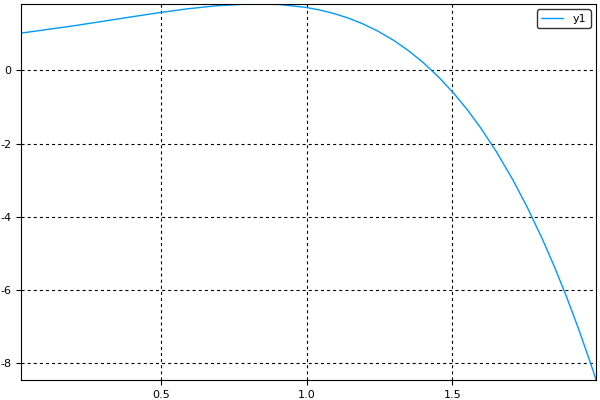

In [9]:
using Plots
using Optim
f(x) = exp(x) - x^4
minf(x) = -f(x)
brent = optimize(minf,0,2,Brent())
golden = optimize(minf,0,2,GoldenSection())
println("brent = $brent")
println("golden = $golden")
plot(f,0,2)



In [2]:
# how well does this do with many local minima?
fun(x) = exp(x) - x^4 +sin(40*x)
minf(x) = -fun(x)
grid = collect(0:0.0001:2);
v,idx  = findmax(Float64[fun(x) for x in grid])
println("grid maximizer is $(grid[idx])")
golden = optimize(minf,0,2,GoldenSection())
brent = optimize(minf,0,2,Brent())
using Base.Test
println("brent minimizer = $(brent.minimizer)")
println("golden minimizer = $(golden.minimizer)")
plot(fun,0,2)

grid maximizer is 0.8247


LoadError: UndefVarError: optimize not defined

## Beyond One Dimension

### Introducing [Rosenbrock's Banana](https://en.wikipedia.org/wiki/Rosenbrock_function) function

The Banana function is defined by 
	$$ f(x,y) = (a-x)^2  + b(y-x^2)^2  $$

![Banana for $a = 0$. By Gaortizg [GFDL](http://www.gnu.org/copyleft/fdl.html) or [CC BY-SA 3.0](http://creativecommons.org/licenses/by-sa/3.0), via Wikimedia Commons](assets/figs/optimization/rosenbrock.png)

### What is the minimum of that function?

* For $a=1,b=100$, what is the global minimum of that function?
* What are the inputs one needs to supply to an algorithm in a more general example?

## Rosenbrock Banana and Optim.jl

* We will use `Optim` for the rest of this lecture.
* We need to supply the objective function and - depending on the solution algorithm - the gradient and hessian as well.

In [3]:
using Optim
rosenbrock = Optim.UnconstrainedProblems.examples["Rosenbrock"]

# contains:
# function rosenbrock(x::Vector)
#     return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
# end

# function rosenbrock_gradient!(x::Vector, storage::Vector)
#     storage[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
#     storage[2] = 200.0 * (x[2] - x[1]^2)
# end

# function rosenbrock_hessian!(x::Vector, storage::Matrix)
#     storage[1, 1] = 2.0 - 400.0 * x[2] + 1200.0 * x[1]^2
#     storage[1, 2] = -400.0 * x[1]
#     storage[2, 1] = -400.0 * x[1]
#     storage[2, 2] = 200.0
# end

# there are many other examples on Optim.UnconstrainedProblems

Optim.UnconstrainedProblems.OptimizationProblem("Rosenbrock",Optim.UnconstrainedProblems.rosenbrock,Optim.UnconstrainedProblems.rosenbrock_gradient!,Optim.UnconstrainedProblems.rosenbrock_hessian!,[0.0,0.0],[1.0,1.0],true,true)

## Comparison Methods

* We will now look at a first class of algorithms, which are very simple, but sometimes a good starting point.
* They just *compare* function values.
* *Grid Search* : Compute the objective function at $G=\{x_1,\dots,x_N\}$ and pick the highest value of $f$. 
	* This is very slow.
	* It requires large $N$.
	* But it's robust (will find global optimizer for large enough $N$)

In [4]:
# grid search on rosenbrock
grid = collect(-1.0:0.1:3);
grid2D = [[i;j] for i in grid,j in grid];
val2D = map(rosenbrock.f,grid2D);
r = findmin(val2D);
println("grid search results in minimizer = $(grid2D[r[2]])")

grid search results in minimizer = [1.0,1.0]


## Bracketing for Multidimensional Problems: Nelder-Mead

* The Goal here is to find the simplex containing the local minimizer $x^*$
* In the case where $f$ is n-D, this simplex has $n+1$ vertices
* In the case where $f$ is 2-D, this simplex has $2+1$ vertices, i.e. it's a triangle.
* The method proceeds by evaluating the function at all $n+1$ vertices, and by replacing the worst function value with a new guess.
* this can be achieved by a sequence of moves:
	* reflect
	* expand
	* contract
	* shrink
	movements.

<div class="center" style="width: auto; margin-left: auto; margin-right: auto;"> ![](assets/figs/optimization/neldermeadsteps.jpg) </div>

* this is a very popular method. The matlab functions `fmincon` and `fminsearch` implements it.
* When it works, it works quite fast.
* No derivatives required.

In [5]:
optimize(rosenbrock, [0.0, 0.0], NelderMead())

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [0.0,0.0]
 * Minimizer: [0.9999710322210338,0.9999438685860869]
 * Minimum: 1.164323e-09
 * Iterations: 74
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 108

* But.


## Bracketing for Multidimensional Problems: Comment on Nelder-Mead

> Lagarias et al. (SIOPT, 1999):
At present there is no function in any dimension greater than one, for which the original Nelder-Mead algorithm has been proved to converge to a minimizer.

>Given all the known inefficiencies and failures of the Nelder-Mead algorithm [...], one might wonder why it is used at all, let alone why it is so extraordinarily popular.





## Reminder: Optimality Conditions 

### Notation


* Unless otherwise noted, we have $x \in \mathbb{R}^n$ as an $n$ element vector.
* The **gradient** of a function $f : \mathbb{R}^n \mapsto \mathbb{R}$ is denoted $\nabla f:\mathbb{R}^n \mapsto \mathbb{R}^n$ a it returns a vector
	$$ \nabla f(x) = \left(\frac{\partial f}{\partial x_1}(x),\frac{\partial f}{\partial x_2}(x),\dots,\frac{\partial f}{\partial x_n}(x) \right) $$
* It's **hessian** is a function denoted $\nabla^2 f(x)$ or $H_f :\mathbb{R}^n \mapsto \mathbb{R}^{n\times n}$ and returns an $(n,n)$ matrix given by
	$$  H_f(x) = \left( \begin{array}{c} \frac{\partial^2 f}{\partial x_1 \partial x_1}(x)  &  \frac{\partial^2 f}{\partial x_2 \partial x_1}(x) & \dots & \frac{\partial^2 f}{\partial x_n \partial x_1}(x) \\
	                     \frac{\partial^2 f}{\partial x_1 \partial x_2}(x)  &  \frac{\partial^2 f}{\partial x_2 \partial x_2}(x) & \dots & \frac{\partial^2 f}{\partial x_n \partial x_2}(x) \\
	                     \vdots & \vdots & \dots & \vdots \\
	                     \frac{\partial^2 f}{\partial x_1 \partial x_n}(x)  &  \frac{\partial^2 f}{\partial x_2 \partial x_n}(x) & \dots & \frac{\partial^2 f}{\partial x_n \partial x_n}(x) 
	                     \end{array}
	             \right)
	$$




### Optimality Conditions

* **First Order Necessary Conditions**:
	If $f$ is continously differentiable and $x^*$ is a local minimizer of $f$, then $\nabla f(x^*) = 0$.
* **Second Order Necessary Conditions**:
	If $f$ is twice continuously differentiable and $x^*$ is a local minimizer of $f$, then $\nabla f(x^*) = 0$ *and* $H_f (x^*)$ is positive semi-definite, i.e. we have $s^T H_f (x^*) s \geq 0$ for all $s \in \mathbb{R}^n$.
* **Second Order Sufficient Conditions**:
	If $f$ is twice continuously differentiable and at $x^*$ we have that $\nabla f(x^*) = 0$ *and* $H_f (x^*)$ is positive definite, i.e. $s^T H_f (x^*) s > 0,s\neq 0$ then $x^*$ is a local minimizer of $f$.
* More sophisticated solvers make ample use of those.



## Reminder: Sufficient Conditions for Global Optimality 

* If $f$ is convex, then any local minimizer $x^*$ is a global minimizer.
*  If $f$ is convex and differentiable on $\mathbb{R}^n$ , then any point $x^*$ is a global minimizer if and only if it is a stationary point, i.e. if f$\nabla f(x^*) = 0$.

## Reminder: Taylor's Theorem

* Many of the ensuing methods are based on Taylor's theorem, so let's remind ourselves of it:

<!-- 	f(x) & = & f(x^0) + \sum_{i=1}^n \frac{\partial f}{\partial x_i} (x^0) (x_i - x^0) \\
	     & + & \frac{1}{2} + \sum_{i=1}^n \frac{\partial f}{\partial x_i} (x^0) (x_i - x^0) \\
 -->

* Suppose that $f \in C^{n+1}[a,b]$, and $x,x^0 \in [a,b]$. Then
	$$ \begin{align}
	f(x)  = & f(x^0) + f'(x^0)(x - x^0) + f''(x^0)\frac{(x- x^0)^2}{2}\\
	      + & \dots + f^{(n)}(x^0)\frac{(x - x^0)^n}{n!} + R_{n+1}(x) 
	     \end{align}
	     $$
    where $R_{n+1}(x) = \mathcal{o}\left(\Vert (x-x^0) \Vert^{n+1}\right)$ is reminder term that converges at a rate $n+1$ to zero, i.e. 
* we say a function $f$ is $\mathcal{o}(\Vert x \Vert^n)$ if $\lim_{x\to 0}\Vert f(x) \Vert / \Vert x \Vert^n =0$.
* we say a function $f$ is $\mathcal{O}(\Vert x \Vert^n)$ if $\lim_{x\to 0}\Vert f(x) \Vert / \Vert x \Vert^n < \infty$



## A quick Note on Computing Derivatives

* Finite Differences
* Automatic Differentiation
* We have talked about this in a separate session.
* For now just remember that if we don't supply analytic gradients, and the algorithm requires them, this often triggers a numerical approximation of the gradient known as finite differences. This is most of the times a slow proceedure.



## Two Strategies: Line Search and Trust Region

* We only provide an overview of methods here. If you want to *really* know the details about those algorithms, I invite you to consult [@nocedal-wright].

### The Line Search Strategy

* An algorithm from the line search class  chooses a direction $p_k \in \mathbb{R}^n$ and searches along that direction starting from the current iterate $x_k \in \mathbb{R}^n$ for a new iterate $x_{k+1} \in \mathbb{R}^n$ with a lower function value.
* After deciding on a direction $p_k$, one needs to decide the *step length* $\alpha$ to travel by solving
	$$ \min_{\alpha>0} f(x_k + \alpha p_k) $$
* In practice, solving this exactly is too costly, so algos usually generate a sequence of trial values $\alpha$ and pick the one with the lowest $f$.



### The Trust Region Strategy

* Here we construct a *model function* $m_k$ that is similar to $f$ around $x_k$.
* We acknowledge that $m_k$ is decent approximation of $f$ only in some *region*.
* The problem is then to find a candidate step length $p$ by solving
	$$ \min_p m_k (x_k + p) $$ where $x_k + p$ lies inside the trust region.
* If candidate $p$ does not produce a value lower than $f(x_k)$, we must have had a too large trust region, shrink it, and do it again.
* Usually the trust region is a ball $\Vert p \Vert_2 \leq \Delta$, where $\Delta$ is called the *trust region radius*, but elliptical and box regions are possible.
* A common definition of the model function is a quadratic of the form
	$$ m_k(x_k + p) = f(x_k) + p^T \nabla f(x_k) + \frac{1}{2} p^T B(x_k) p $$
	where gradient and matrix $B(x_k)$ are evaluated at the current iterate, so the model function is in agreement to first order with $f$ at the current guess.
* The matrix $B(x_k)$ is either the Hessian $H_f$ or some approximation to it.





## Trust Region Example

* Suppose we have $f(x) = 10(x_2 - x_1^2)^2 + (1-x_1)^2$. At point $x_k= (0,1)$ gradient and hessian are:
* ?

$$ \nabla f(x_k) = \left[ \begin{array}{c} -2 \\ 20 \end{array} \right], \quad \quad \nabla^2 f(x_k) = \left[ \begin{array}{c} -38 & 0 \\ 0 & 20 \end{array} \right] $$

![Figure 2.4 of [@nocedal-wright]](assets/figs-restricted/trust-region.png)

* In this figure, we use $B(x_k) = \nabla^2 f(x_k)$. 
* After each unsuccesful step, the new candidate step will be shorter, and will go in a different direction
* This is the main difference to line search methods.
* Main difference between the two methods: order in which they change *direction* and *step length*
	* line search fixes direction $p_k$ and finds right distance $\alpha_k$
	* trust region fixes an appropriate radius $\Delta_k$

## Line Search Methods: Which Direction to go?


### Steepest Descent

* The direction $-\nabla f(x_k)$ is an obvious choice: Among all possible directions, along this one $f$ decreases most rapidly.
* This claim can be verified using Taylor's theorem.
* The **steepest descent method** is a line search method that moves along
	$$ p_k = -\nabla f(x_k) $$
* The step length $\alpha_k$ can be chosen in many different ways.
* There are many other *descent* directions, steepest descent is but one of them.

In [6]:
# there is a dedicated LineSeach package: https://github.com/JuliaNLSolvers/LineSearches.jl
GD = optimize(rosenbrock.f, rosenbrock.g!,[0.0, 0.0],GradientDescent())
GD1 = optimize(rosenbrock.f, rosenbrock.g!,[0.0, 0.0],GradientDescent(),Optim.Options(iterations=5000))
GD2 = optimize(rosenbrock.f, rosenbrock.g!,[0.0, 0.0],GradientDescent(),Optim.Options(iterations=50000))

println("gradient descent = $GD")
println("\n")
println("gradient descent 2 = $GD1")
println("\n")
println("gradient descent 3 = $GD2")

gradient descent = Results of Optimization Algorithm
 * Algorithm: Gradient Descent
 * Starting Point: [0.0,0.0]
 * Minimizer: [0.9356732500354086,0.875073922357589]
 * Minimum: 4.154782e-03
 * Iterations: 1000
 * Convergence: false
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: false
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: true
 * Objective Function Calls: 3532
 * Gradient Calls: 3532


gradient descent 2 = Results of Optimization Algorithm
 * Algorithm: Gradient Descent
 * Starting Point: [0.0,0.0]
 * Minimizer: [0.9978398797724763,0.9956717950747302]
 * Minimum: 4.682073e-06
 * Iterations: 5000
 * Convergence: false
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: false
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: true
 * Objective Function Calls: 17532
 * Gradient Calls: 17532


gradient descent 3 = Results of Optimization Algori

![Figure 2.5 of [@nocedal-wright]](assets/figs-restricted/steepest-descent.png)



## Line Search Methods: The **Newton** Direction

* Probably the most important descent direction.
* In vector notation, the 2nd order taylor series approximation to $f(x_k + p)$ is
	$$ f(x_k + p) \approx f(x_k) + p^T \nabla f(x_k) + \frac{1}{2} p^T \nabla^2 f(x_k) p \equiv m_k(p) $$
* the Newton direction is obtained by finding the vector $p$ that minimizes $m_k(p)$, i.e. by setting the derivative of $m_k(p)$ to zero.
* We obtain
	$$ p_k^N = -(\nabla^2 f(x_k))^{-1} \nabla f(x_k)  $$
* The newton direction is reliable if the discrepancy between truth and model $m$ is not too large at $x_k$.
* The biggest drawback is the need to compute the Hessian. This can be difficult analytically at times, and overly expensive numerically.

In [7]:
optimize(rosenbrock.f, rosenbrock.g!, rosenbrock.h!, [0.0, 0.0], Newton(),Optim.Options(show_trace=true))

Iter     Function value   Gradient norm 
     0     1.000000e+00     2.000000e+00
     1     8.431140e-01     1.588830e+00
     2     6.776980e-01     3.453340e+00
     3     4.954645e-01     4.862093e+00
     4     3.041921e-01     2.590086e+00
     5     1.991512e-01     3.780900e+00
     6     9.531907e-02     1.299090e+00
     7     5.657827e-02     2.445401e+00
     8     2.257807e-02     1.839332e+00
     9     6.626125e-03     1.314236e+00
    10     8.689753e-04     5.438279e-01
    11     4.951399e-06     7.814556e-02
    12     9.065070e-10     6.017046e-04
    13     9.337686e-18     1.059738e-07
    14     3.081488e-31     1.110223e-15


Results of Optimization Algorithm
 * Algorithm: Newton's Method
 * Starting Point: [0.0,0.0]
 * Minimizer: [0.9999999999999994,0.9999999999999989]
 * Minimum: 3.081488e-31
 * Iterations: 14
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: true
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 58
 * Gradient Calls: 58


## Quasi-Newton Methods

* In response to the difficulties of getting the Hessian, quasi-newton methods propose to approximate $B(x_k)$ with something *similar* to the hessian.
* Taylors Theorem implies that 
	$$ \nabla^2 f(x_{k+1} - x_{k}) \approx \nabla f(x_{k+1}) - \nabla f(x_k) $$
	and so we choose a $B$ matrix that mimics this property.
* This leads to the *secant condition*
	$$ B_{k+1} (x_{k+1} - x_{k}) = f(x_{k+1}) - \nabla f(x_k) $$
* There are different ways to update the hessian in this way.
* One of the best known is the BFGS method (after Broydon, Fletcher, Goldfarb and Shanno).
* Those methods get the search direction by using $B_k$ instead of the exact Hessian, i.e.
	$$ p_k = -B_k^{-1} \nabla f(x_k)  $$

In [8]:
@show optimize(rosenbrock.f, rosenbrock.g!, rosenbrock.h!,  [0.0, 0.0], BFGS());
# low memory BFGS
@show optimize(rosenbrock.f, rosenbrock.g!, rosenbrock.h!,  [0.0, 0.0], LBFGS());


optimize(rosenbrock.f,rosenbrock.g!,rosenbrock.h!,[0.0,0.0],BFGS()) = Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0]
 * Minimizer: [0.9999999999373613,0.9999999998686219]
 * Minimum: 7.645563e-21
 * Iterations: 16
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: true
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 69
 * Gradient Calls: 69
optimize(rosenbrock.f,rosenbrock.g!,rosenbrock.h!,[0.0,0.0],LBFGS()) = Results of Optimization Algorithm
 * Algorithm: L-BFGS
 * Starting Point: [0.0,0.0]
 * Minimizer: [1.0000000000000007,1.000000000000001]
 * Minimum: 5.374115e-30
 * Iterations: 21
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: true
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 90
 * Gradient Ca


## Practical Considerations

### Stopping criteria

* In all of the above examples, we did not alter the default values for stopping criteria.
* There are different things you could focus on as a stopping criterion with `Optim`, and similarly in most solver packages.
	* `xtol`: changes in $x$ from one iterate to the next
	* `ftol`: perentage changes in $f$ from one iterate to the next
	* `grtol`: absolute value of the gradient beign smaller than this number.




## Some Applications in Economics

* Maximum Likelihood Estimation
* The Nested Fixed Point Algorithm
	* [@rust-bus] is a maximum likelihood estimation with an inner loop that solves a dynamic programming problem.
	* [@BLP] is a GMM estimation with an inner fixed point problem.